#### (c)Take a grayscale image of size 512x512, apply harmonic & geometric mean filter on the noisy image & compare their performance with PSNR

In [46]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

### Loading the image

shape of the image: (688, 688)


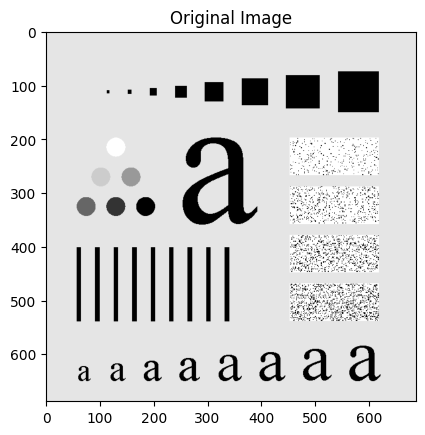

min pixel intensity: 0
max pixel intensity: 255


In [47]:
original_image= cv2.imread('./images/Characters_Test_Pattern.tif',0)
print(f'shape of the image: {original_image.shape}')
plt.imshow(original_image,cmap='gray')
plt.title('Original Image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### PSNR(peak signal to noise ratio) function

In [48]:
def cal_psnr(actual_image, distored_image):
    actual_image = np.float64(actual_image)
    distored_image = np.float64(distored_image)
    mse = np.mean((actual_image - distored_image)**2) #MSE ERROR
    if mse == 0:
        mse = int('inf')
    max_pixel = 255.0
    psnr_val = 10*np.log10((max_pixel*max_pixel)/(mse))
    
    return psnr_val

### Function for salt(white pixel) and pepper(black pixel) noise

In [49]:
def add_salt_and_peeper_noise(image,prob):
    noisy_image = image.copy()
    rows, cols = image.shape
    
    #add salt noise(white pixels)
    num_salt = int(prob*rows*cols/2)
    salt_coords = [np.random.randint(0,rows,num_salt), np.random.randint(0,cols,num_salt)] #np.random.randint(start,end,num_of_random_points)
    noisy_image[salt_coords[0],salt_coords[1]] = 255
    
    #add pepper noise(black piexel)
    num_pepper = int(prob*rows*cols/2)
    pepper_coords = [np.random.randint(0,rows,num_pepper), np.random.randint(0,cols,num_pepper)]
    noisy_image[pepper_coords[0],pepper_coords[1]] = 0
    
    return noisy_image
    
    
    

### Function for Hermonic mean filter

In [89]:
#The Harmonic Mean Filter works well for salt noise, but fails for pepper noise
def Hermonic_mean_filter(image, mask_size):
    height, width = image.shape
    filtered_image = np.zeros_like(image, dtype=np.float64)
    pad = mask_size // 2
    
    #apply the averaging filter to each pizel in the image
    for i in range(height):
        for j in range(width):
            inverse_sum, count = 0, 0
            #loop through the neighborhood defined by the mask size
            for x in range(-pad, pad+1):
                for y in range(-pad, pad+1):
                    neighbor_i, neighbor_j = i+x, j+y
                    #check if the neighbor pixel is within bounds of the image
                    if 0<=neighbor_i<height and 0<=neighbor_j<width:
                        inverse_sum += 1.0/float(image[neighbor_i, neighbor_j] + 1e-4) #10^-4 is added for avoiding division by zero error
                        count+=1
            filtered_image[i,j] = count/inverse_sum            
            
            
    return np.uint8(filtered_image) 

### Function for Geometric mean filter

In [90]:
#The Geometric Mean Filter works well for pepper noise, but fails for salt noise

def Geometric_mean_filter(image, mask_size):
    height, width = image.shape
    filtered_image = image.copy()
    pad = mask_size // 2
    
    #apply the averaging filter to each pizel in the image
    for i in range(height):
        for j in range(width):
            product, count = 1, 0
            #loop through the neighborhood defined by the mask size
            for x in range(-pad, pad+1):
                for y in range(-pad, pad+1):
                    neighbor_i, neighbor_j = i+x, j+y
                    #check if the neighbor pixel is within bounds of the image
                    if 0<=neighbor_i<height and 0<=neighbor_j<width:
                        if image[neighbor_i,neighbor_j]:
                            product = product * int(image[neighbor_i,neighbor_j])
                            count+=1
            count = 1 if count==0 else count            
            filtered_image[i,j] = product ** (1/count)
            
    return np.uint8(filtered_image) 

### Adding 25% salt and pepper noise

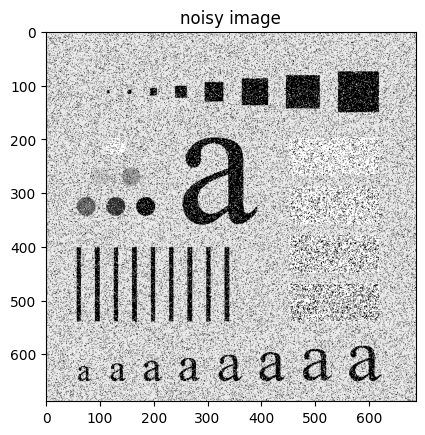

PSNR = 10.081342423876603 dB


In [80]:
noise_probability = 0.25 # 25% noise(25*(1/2)slat_noise + 25*(1/2)pepper_noise)
noisy_image = add_salt_and_peeper_noise(original_image,noise_probability)

plt.imshow(noisy_image,cmap='gray')
plt.title('noisy image')
plt.show()

psnr = cal_psnr(original_image, noisy_image)
print(f"PSNR = {psnr} dB")

### Applying hermonic mean filter

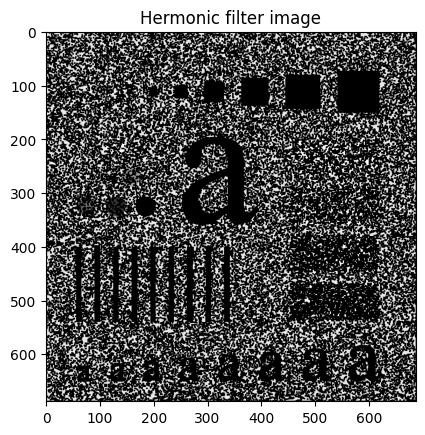

PSNR = 2.8885035511746437 dB


In [88]:
hermonic_filter_image = Hermonic_mean_filter(noisy_image,3)

plt.imshow(hermonic_filter_image, cmap='gray')
plt.title('Hermonic filter image')
plt.show()

psnr = cal_psnr(original_image, hermonic_filter_image)
print(f"PSNR = {psnr} dB")

### Applying the geometric mean

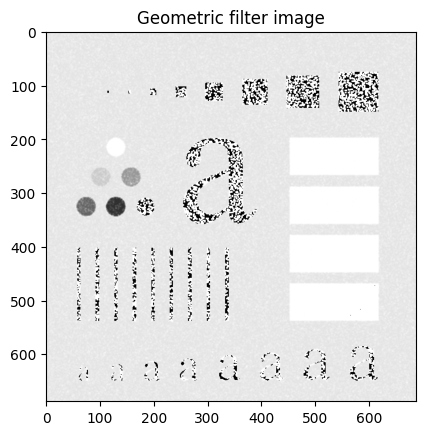

PSNR = 11.495305770862842 dB


In [67]:
geometric_filter_image = Geometric_mean_filter(noisy_image,3)

plt.imshow(geometric_filter_image, cmap='gray')
plt.title('Geometric filter image')
plt.show()

psnr = cal_psnr(original_image, geometric_filter_image)
print(f"PSNR = {psnr} dB")